In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('cleaned_data.csv')

In [8]:
df.head()

,Unnamed: 0,date,desc,credit,payment,day,month,year,month_name,week_number,business_name,store_number,location,province
0,0,2023-08-28,"TIM HORTONS #5524 TORONTO, ON",1.67,NaN,28,8,2023,August,35,tim hortons,5524.0,toronto,ON
1,1,2023-08-28,"PITA LITE - KING STREET TORONTO, ON",10.74,NaN,28,8,2023,August,35,pita lite - king street,NaN,toronto,ON
2,2,2023-08-28,"TIM HORTONS # 9397 TORONTO, ON",1.67,NaN,28,8,2023,August,35,tim hortons,9397.0,toronto,ON
3,3,2023-08-28,"REXALL PHARMACY #8159 TORONTO, ON",1.14,NaN,28,8,2023,August,35,rexall pharmacy,8159.0,toronto,ON
4,4,2023-08-28,"REXALL PHARMACY #8159 TORONTO, ON",4.11,NaN,28,8,2023,August,35,rexall pharmacy,8159.0,toronto,ON


<Axes: >

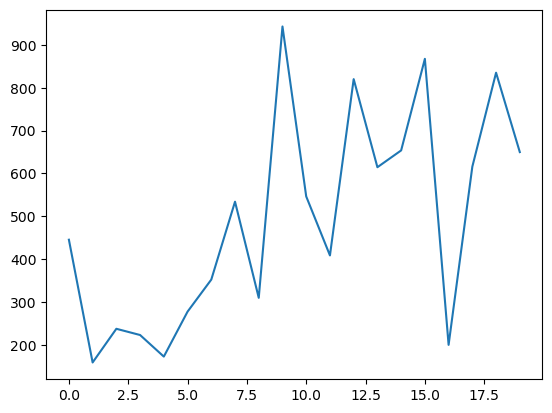

In [25]:
df_month=df.groupby(['year','month'])['credit'].sum().reset_index()


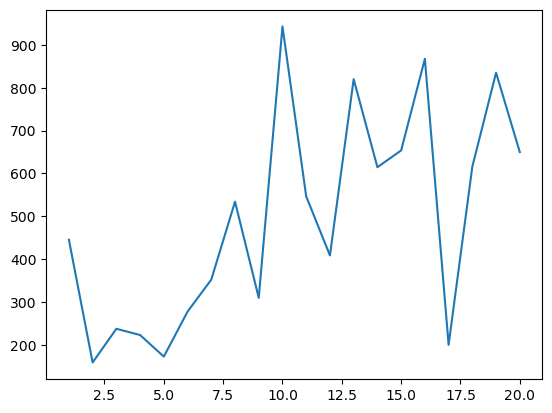

In [31]:
plt.plot(range(1,df_month.shape[0]+1),df_month['credit'])

In [41]:
## Let us start from very basic things and scale all the way up 
df_month["sma"]=df_month['credit'].rolling(2).mean()
df_month

,year,month,credit,sma
0,2022,1,445.29,NaN
1,2022,2,158.78,302.035
2,2022,3,237.41,198.095
3,2022,4,222.87,230.140
4,2022,5,172.50,197.685
5,2022,6,277.40,224.950
6,2022,7,352.21,314.805
7,2022,8,534.03,443.120
8,2022,9,309.71,421.870
9,2022,10,942.99,626.350


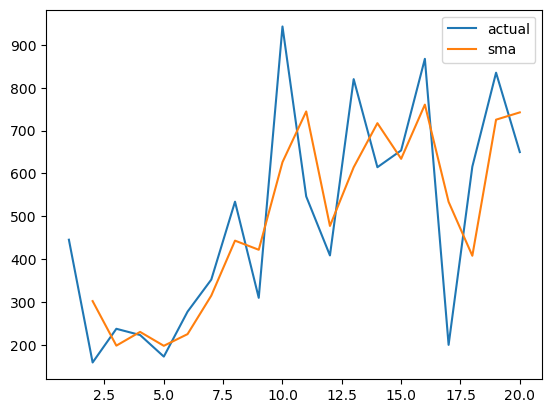

In [42]:
plt.plot(range(1,df_month.shape[0]+1),df_month['credit'],label="actual")
plt.plot(range(1,df_month.shape[0]+1),df_month['sma'],label="sma")
plt.legend()

In [44]:
from sklearn.metrics import *
mae = mean_absolute_error(df_month['credit'][1:], df_month['sma'][1:])
mse=mean_squared_error(df_month['credit'][1:], df_month['sma'][1:])
rmse=np.sqrt(mse)
print(mae,mse,rmse)

119.51684210526314 22739.734113157898 150.79699636649895


In [46]:
df_month['credit'][-3:].mean()

700.27

In [9]:
## generate new features 
df_freq=pd.read_csv('business_cat.csv')
df_freq.head()

,Unnamed: 0,name,count,category,cat_code
0,0,rexall pharmacy,282,very high,1
1,1,tim hortons,151,very high,1
2,2,freshco,77,high,2
3,3,presto,48,med,3
4,4,rogers,18,low,4
